In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/ML_TA_Teaching_Material/iris.csv')

In [ ]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [ ]:
pip install plotly_express

In [ ]:
import plotly_express as px
px.histogram(iris, x = 'sepal.length',color = 'variety',nbins=20)

In [ ]:
p_setosa = len(iris[iris['variety']=='Setosa'])/len(iris)
p_versicolor = len(iris[iris['variety']=='Versicolor'])/len(iris)
p_virginica = len(iris[iris['variety']=='Virginica'])/len(iris)
print(p_setosa,p_versicolor,p_virginica)

0.3333333333333333 0.3333333333333333 0.3333333333333333


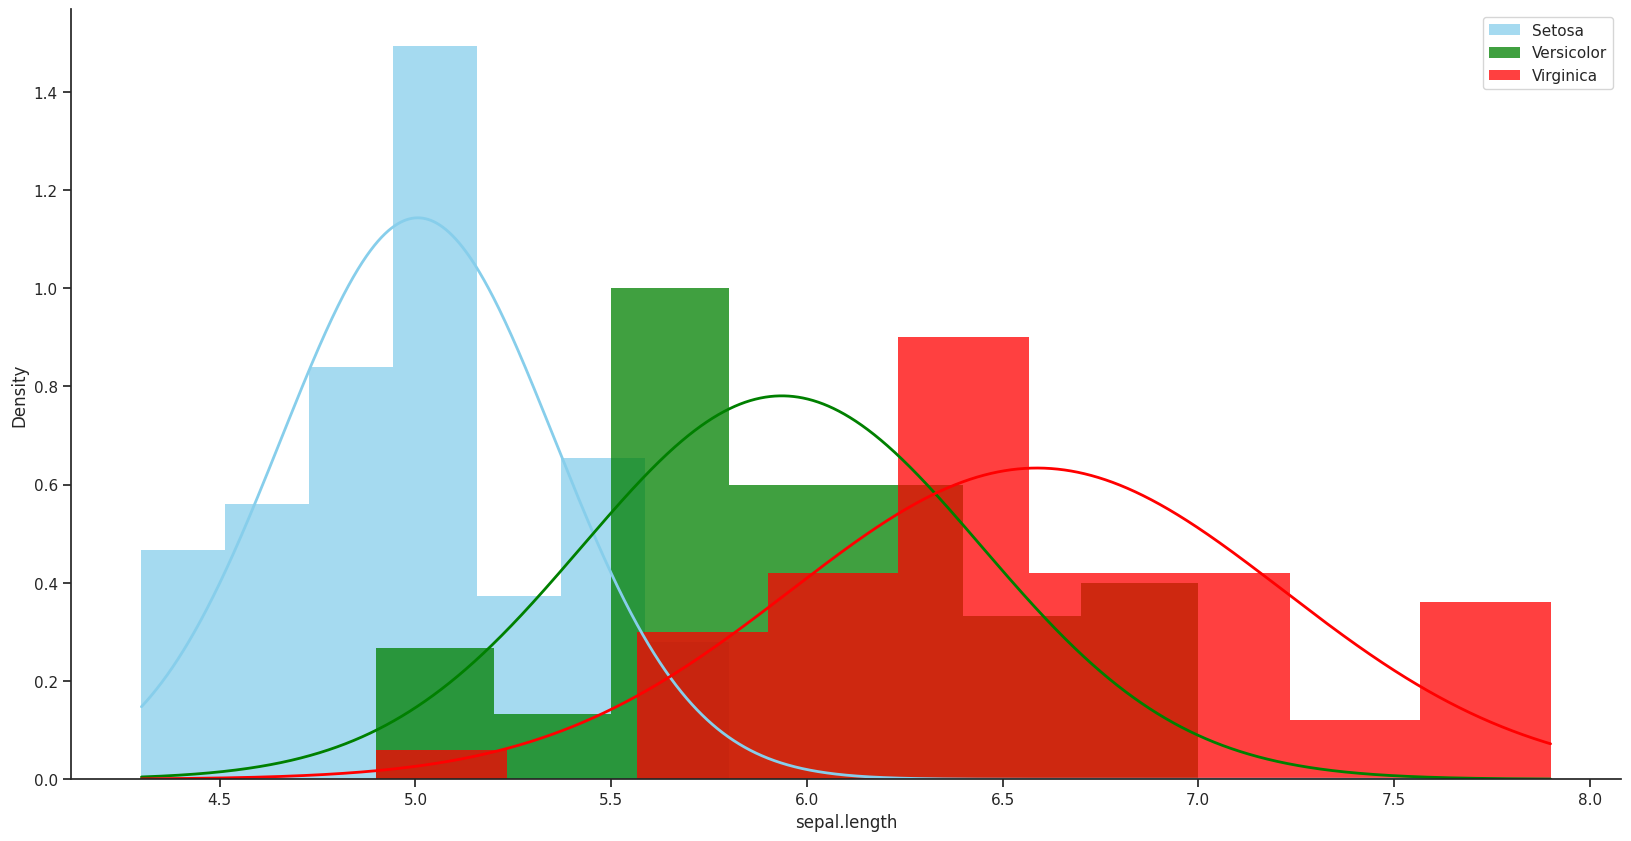

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

sns.set(style="ticks")
# calculate the pdf over a range of values
xx = np.arange(min(iris['sepal.length']), max(iris['sepal.length']),0.001)
x = iris[iris['variety']=='Setosa']['sepal.length']
sns.histplot(x, color="skyblue", label="Setosa", kde=False, stat="density", linewidth=0)

# sns.distplot(x, kde = False, norm_hist=True,color='skyblue',label = 'Setosa')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'skyblue', lw=2)
x = iris[iris['variety']=='Versicolor']['sepal.length']

sns.histplot(x, color="green", label="Versicolor", kde=False, stat="density", linewidth=0)

# sns.distplot(x, kde = False, norm_hist=True,color='green',label = 'Versicolor')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'green', lw=2)
x = iris[iris['variety']=='Virginica']['sepal.length']

g=sns.histplot(x, color="red", label="Virginica", kde=False, stat="density", linewidth=0)

# g = sns.distplot(x, kde = False, norm_hist=True,color='red',label = 'Virginica')
yy = stats.norm.pdf(xx,loc=np.mean(x),scale=np.std(x))
plt.plot(xx, yy, 'red', lw=2)
sns.despine()
g.figure.set_size_inches(20,10)
g.legend()

In [ ]:
x = iris[iris['variety']=='Setosa']['sepal.length']
print("Setosa",stats.norm.pdf(7,loc=np.mean(x),scale=np.std(x))*.33)
x = iris[iris['variety']=='Versicolor']['sepal.length']
print("Versicolor",stats.norm.pdf(7,loc=np.mean(x),scale=np.std(x))*.33)
x = iris[iris['variety']=='Virginica']['sepal.length']

print("Virginica",stats.norm.pdf(7,loc=np.mean(x),scale=np.std(x))*.33)

Setosa 3.062104211904875e-08
Versicolor 0.02947875746566936
Virginica 0.16881724812694823


In [ ]:
px.scatter(iris, 'sepal.length', 'petal.length',color = 'variety')

In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

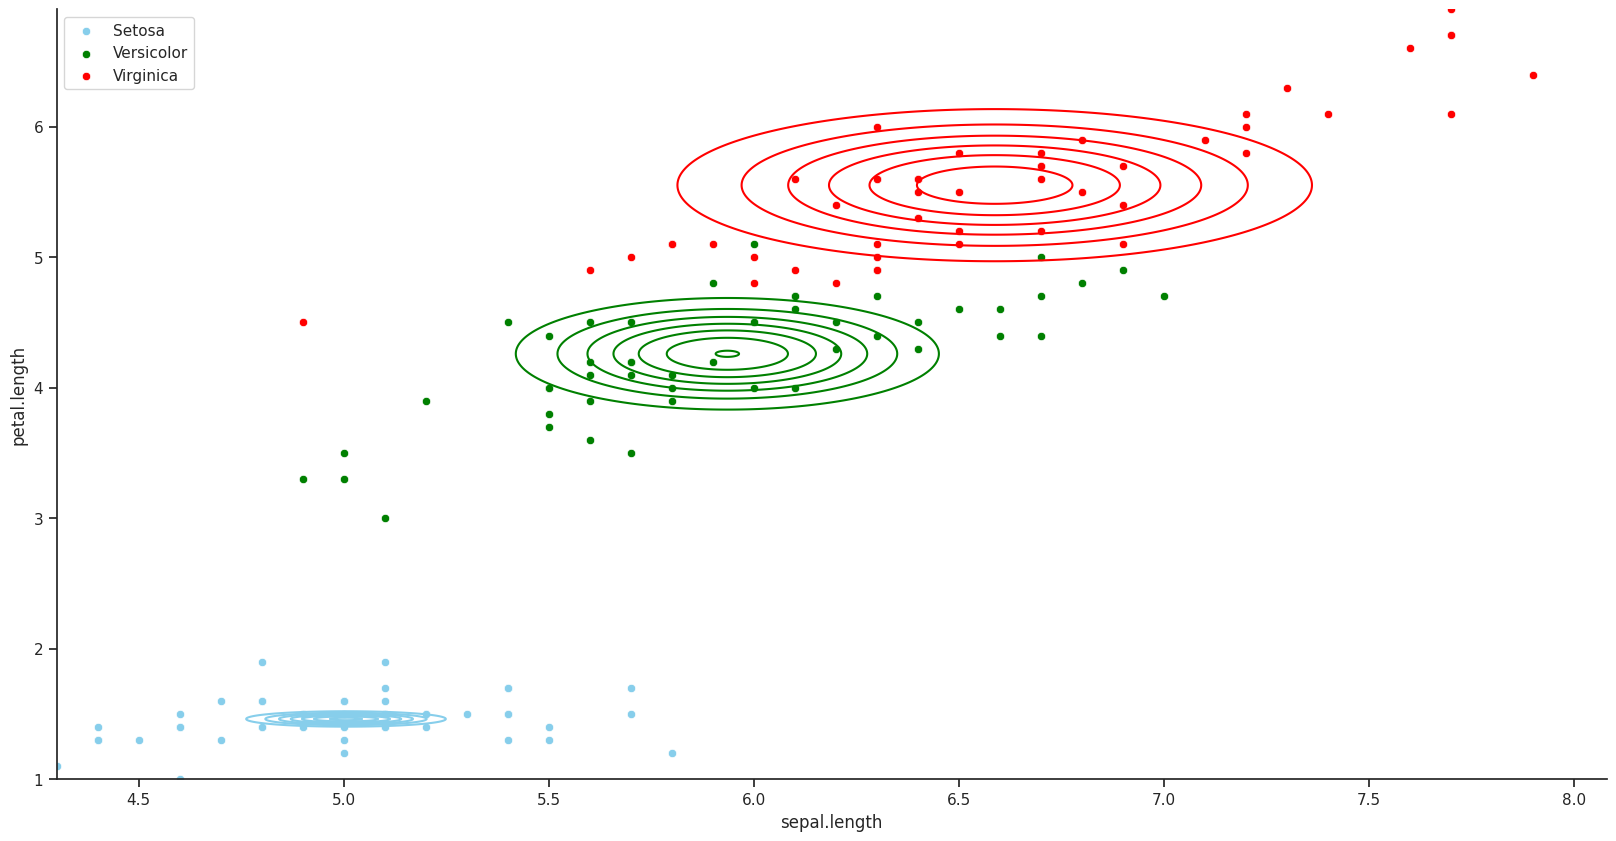

In [ ]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# from matplotlib.mlab import bivariate_normal
sns.set(style="ticks")
# SETOSA
x1 = iris[iris['variety']=='Setosa']['sepal.length']
x2 = iris[iris['variety']=='Setosa']['petal.length']
# sns.scatterplot(data=data, x="value", y="time", hue="crop_type")
# sns.scatterplot(x1,x2, color='skyblue',label = 'Setosa')
sns.scatterplot(x=x1,y=x2, color='skyblue',label = 'Setosa  ')
mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)
X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='skyblue')

# VERSICOLOR
x1 = iris[iris['variety']=='Versicolor']['sepal.length']
x2 = iris[iris['variety']=='Versicolor']['petal.length']
sns.scatterplot(x=x1,y=x2,color='green',label = 'Versicolor')

mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)
X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='green')


# VIRGINICA
x1 = iris[iris['variety']=='Virginica']['sepal.length']
x2 = iris[iris['variety']=='Virginica']['petal.length']
g = sns.scatterplot(x=x1, y=x2, color='red',label = 'Virginica')
mu_x1=np.mean(x1)
mu_x2=np.mean(x2)
sigma_x1=np.std(x1)**2
sigma_x2=np.std(x2)**2
xx = np.arange(min(x1), max(x1),0.001)
yy = np.arange(min(x2), max(x2),0.001)
X, Y = np.meshgrid(xx, yy)
Z = bivariate_normal(X,Y, sigma_x1, sigma_x2, mu_x1, mu_x2)
plt.contour(X,Y,Z,colors='red')
sns.despine()
g.figure.set_size_inches(20,10)
g.legend()


In [ ]:
# sns.scatterplot(x1=x1,x2=x2, color='skyblue',label = 'Setosa')


In [ ]:
# print(x1)
# print(x2)